Chloe Quinto    
CPE 695/WS  
HW2   
February 12, 2020   
I pledge my honor that I have abided by the Stevens Honor System - Chloe Quinto 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

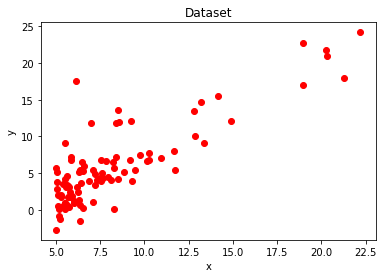

In [2]:
"""
In this problem, we write a program to find the coefficients for a linear regression model for the dataset
provided by (data2.txt). Assume a linear model: y = w0 + w1* x
"""


data = pd.read_csv("data2.txt", header = None)

x = np.array(data[0])
y = np.array(data[1])

plt.scatter(x,y,color='red')
plt.title("Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [3]:
# Computes the cost of the linear regresesion 
def cost_function(input_var, output_var, params):
    num_samples = len(input_var)
    cost_sum = 0.0
    for a,b in zip(input_var, output_var):
        y_ = np.dot(params, np.array([1.0, a]))
        cost_sum += (y_ - b) ** 2
    
    cost = cost_sum / (num_samples * 2.0)
    
    return cost

In [4]:
def lin_reg_batch_gradient_descent(input_var, output_var, params, alpha, max_iter):
    iteration = 0
    num_samples = len(input_var)
    cost = np.zeros(max_iter)
    params_store = np.zeros([2, max_iter])
    
    while iteration < max_iter:
        cost[iteration] = cost_function(input_var, output_var, params)
        params_store[:, iteration] = params
        
        print("iteration: " + str(iteration) + " cost: " + str(cost[iteration]))
        
        for x,y in zip(input_var, output_var):
            y_hat = np.dot(params, np.array([1.0, x]))
            gradient = np.array([1.0, x]) * (y - y_hat)
            params += alpha * gradient/num_samples
            
        iteration += 1
    
    return params, cost, params_store
    

In [5]:


# we want 20% of our data to be a test 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)


In [11]:
'''
Batch Gradient Descent
'''
params_theta = np.array([20.0, 80.0])
alpha_batch = 1e-3
max_iterations = 100

params_hat_batch, cost_batch, params_store_batch =lin_reg_batch_gradient_descent(x_train, y_train, params_theta, alpha_batch, max_iterations)


iteration: 0 cost: 270840.8686877118
iteration: 1 cost: 229381.15345992995
iteration: 2 cost: 194268.62428119304
iteration: 3 cost: 164531.5762262411
iteration: 4 cost: 139347.06452403477
iteration: 5 cost: 118018.13060925079
iteration: 6 cost: 99954.51467471723
iteration: 7 cost: 84656.32097083933
iteration: 8 cost: 71700.18381129002
iteration: 9 cost: 60727.55144785711
iteration: 10 cost: 51434.763586475
iteration: 11 cost: 43564.647953032574
iteration: 12 cost: 36899.40335518193
iteration: 13 cost: 31254.572288392952
iteration: 14 cost: 26473.936286155113
iteration: 15 cost: 22425.192749917715
iteration: 16 cost: 18996.2936207527
iteration: 17 cost: 16092.344570297173
iteration: 18 cost: 13632.978900147482
iteration: 19 cost: 11550.133475793764
iteration: 20 cost: 9786.165146949577
iteration: 21 cost: 8292.255528635502
iteration: 22 cost: 7027.059997375203
iteration: 23 cost: 5955.563515189569
iteration: 24 cost: 5048.111617760542
iteration: 25 cost: 4279.589750572349
iteration: 26 

In [7]:
def lin_reg_stoch_gradient_descent(input_var, output_var, params, alpha):
    """Compute the params for linear regression using stochastic gradient descent"""
    num_samples = len(input_var)
    cost = np.zeros(num_samples)
    params_store = np.zeros([2, num_samples])
    
    iteration = 0
    for x,y in zip(input_var, output_var):
        cost[iteration] = cost_function(input_var, output_var, params)
        params_store[:, iteration] = params
        
        print("iteration: " + str(iteration) + " cost: " + str(cost[iteration]))
        
        y_hat = np.dot(params, np.array([1.0, x]))
        gradient = np.array([1.0, x]) * (y - y_hat)
        params += alpha * gradient/num_samples
        
        iteration += 1
            
    return params, cost, params_store

In [8]:
'''
Stochastic Gradient Descent
'''

alpha = 1e-3
params_0 = np.array([20.0, 80.0])
params_hat, cost, params_store = lin_reg_stoch_gradient_descent(x_train, y_train, params_0, alpha)

iteration: 0 cost: 270840.8686877118
iteration: 1 cost: 270547.4875461448
iteration: 2 cost: 270326.87093821814
iteration: 3 cost: 269173.6744210372
iteration: 4 cost: 268862.6390258715
iteration: 5 cost: 268675.6995231866
iteration: 6 cost: 268159.66794114315
iteration: 7 cost: 267787.818073427
iteration: 8 cost: 267602.15082976193
iteration: 9 cost: 267364.70092951093
iteration: 10 cost: 267137.75237004185
iteration: 11 cost: 266508.8229418774
iteration: 12 cost: 265671.0576556974
iteration: 13 cost: 264532.63324151555
iteration: 14 cost: 261199.51987246936
iteration: 15 cost: 258785.7422654639
iteration: 16 cost: 258414.87658309515
iteration: 17 cost: 257983.30073753925
iteration: 18 cost: 257748.3968783861
iteration: 19 cost: 257358.5114415675
iteration: 20 cost: 257131.47456723926
iteration: 21 cost: 256859.1123300919
iteration: 22 cost: 256657.90716209155
iteration: 23 cost: 256129.91453763054
iteration: 24 cost: 255941.63043204768
iteration: 25 cost: 255748.10284024125
iteration

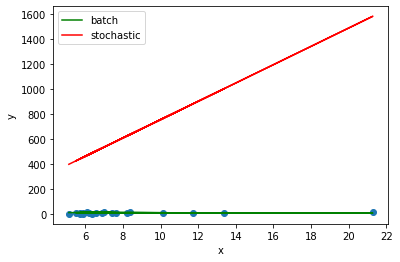

batch      T0, T1: 10.525047204781846, -0.24934860168301148
stochastic T0, T1: 19.358242635868283, 73.59086259684211
batch rms:      6.086012345592733
stochastic rms: 662.6115685913616


In [9]:
plt.scatter(x_test, y_test)
plt.plot(x_test, params_hat_batch[0] + params_hat_batch[1]*x_test, 'g', label='batch')
plt.plot(x_test, params_hat[0] + params_hat[1]*x_test, '-r', label='stochastic')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print(f'batch      T0, T1: {params_hat_batch[0]}, {params_hat_batch[1]}')
print(f'stochastic T0, T1: {params_hat[0]}, {params_hat[1]}')
rms_batch = np.sqrt(np.mean(np.square(params_hat_batch[0] + params_hat_batch[1]*x_test - y_test)))
rms_stochastic = np.sqrt(np.mean(np.square(params_hat[0] + params_hat[1]*x_test - y_test)))
print(f'batch rms:      {rms_batch}')
print(f'stochastic rms: {rms_stochastic}')

Batch Gradient Descent is a lot better 

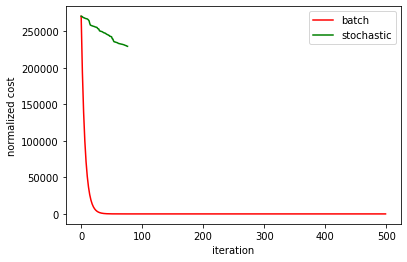

min cost with BGD: 24.68748901874041
min cost with SGD: 229629.04356989032


In [10]:
plt.plot(np.arange(max_iterations), cost_batch, 'r', label='batch')
plt.plot(np.arange(len(cost)), cost, 'g', label='stochastic')
plt.xlabel('iteration')
plt.ylabel('normalized cost')
plt.legend()
plt.show()
print(f'min cost with BGD: {np.min(cost_batch)}')
print(f'min cost with SGD: {np.min(cost)}')